## Build and train a regression model using keras

Dataset : California housing dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

### Data Set Characteristics

#### Number of Instances

20640

#### Number of Attributes

8 numeric, predictive attributes and the target

#### Attribute Information:

Medinc: median income in block

HouseAge: median house age in block

AveRooms: average number of rooms

AveBedrms : average number of bedrooms

AveOccup: average house occupancy

Latitude: house block latitude

Longitudde: house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California distincts

In [4]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing_data.data, housing_data.target, random_state=42) #access independent and dependent data 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

### Standardize data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test )

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
X_train.shape

(11610, 8)

### Build model architecture

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
                       keras.layers.Dense(30, activation="relu"),
                       keras.layers.Dense(1)])

In [21]:
model.compile(loss ="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["mae"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model_history = model.fit(X_test, y_test, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
162/162 [==============================] - 1s 3ms/step - loss: 0.3866 - mae: 0.4468 - val_loss: 0.3806 - val_mae: 0.4374
Epoch 2/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3856 - mae: 0.4443 - val_loss: 0.3772 - val_mae: 0.4366
Epoch 3/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3846 - mae: 0.4443 - val_loss: 0.3776 - val_mae: 0.4370
Epoch 4/20
162/162 [==============================] - 0s 2ms/step - loss: 0.3822 - mae: 0.4431 - val_loss: 0.3674 - val_mae: 0.4359
Epoch 5/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3836 - mae: 0.4427 - val_loss: 0.3735 - val_mae: 0.4372
Epoch 6/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3810 - mae: 0.4432 - val_loss: 0.3700 - val_mae: 0.4333
Epoch 7/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3801 - mae: 0.4414 - val_loss: 0.3660 - val_mae: 0.4315
Epoch 8/20
162/162 [==============================] - 0s 3ms/step - loss: 0.

In [31]:
mae_test = model.evaluate(X_test, y_test)

  1/162 [..............................] - ETA: 4s - loss: 0.3063 - mae: 0.4714

162/162 [==============================] - 0s 1ms/step - loss: 0.3690 - mae: 0.4341


In [32]:
model_history.history

{'loss': [0.38664400577545166,
  0.38556477427482605,
  0.3846317231655121,
  0.38223403692245483,
  0.38355526328086853,
  0.3810490667819977,
  0.38012903928756714,
  0.3798767030239105,
  0.3784189224243164,
  0.37755629420280457,
  0.37590861320495605,
  0.37608802318573,
  0.3749105632305145,
  0.3738846778869629,
  0.3738040328025818,
  0.37247249484062195,
  0.3717586398124695,
  0.37086477875709534,
  0.3712046444416046,
  0.3698917031288147],
 'mae': [0.44681593775749207,
  0.4443322420120239,
  0.44425880908966064,
  0.4431058168411255,
  0.4426772892475128,
  0.443177729845047,
  0.44142547249794006,
  0.44033941626548767,
  0.4401494860649109,
  0.4392940104007721,
  0.43857061862945557,
  0.43855226039886475,
  0.43789345026016235,
  0.43634501099586487,
  0.4365963041782379,
  0.4356822371482849,
  0.43595173954963684,
  0.4341575503349304,
  0.4354354441165924,
  0.43440884351730347],
 'val_loss': [0.3806036412715912,
  0.37719056010246277,
  0.37757983803749084,
  0.367

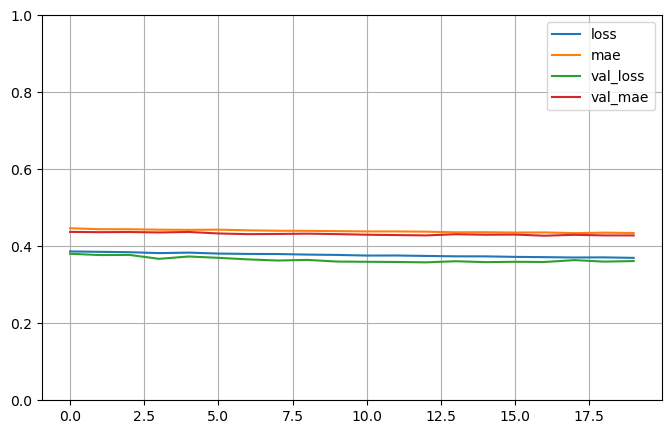

In [33]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [29]:
X_new = X_test[:3]

In [34]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 111ms/step
[[0.81306267]
 [1.6970671 ]
 [3.6912017 ]]
[0.477   0.458   5.00001]
